In [1]:
import torch 
from torch import Tensor 
import numpy as np
import math
import matplotlib.pyplot as plt
import math

In [2]:
class Relu:
    def forward(self, x):   
        self.x = x.clone()
        return x.clamp(min=0)
    
    def backward(self, dz):
        output = self.x.clone()
        output[output > 0] = 1
        output[output < 0] = 0
        return dz.mul(output)

In [5]:
r = Relu()

In [6]:
r.forward(data)


 0.0000  0.8930
 1.5239  0.4815
 0.0000  0.0455
       ⋮        
 0.0000  1.4015
 0.7865  0.9061
 0.7931  0.0000
[torch.FloatTensor of size 1000x2]

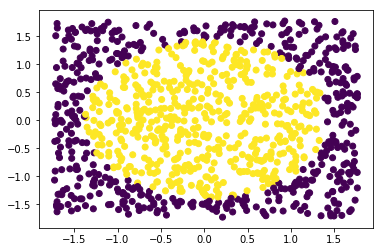

In [3]:
data = torch.FloatTensor(1000,2).uniform_(0, 1) - 0.5
distance = torch.sqrt(torch.pow(data[:, 0], 2) + torch.pow(data[:,1],2)).view(-1,1)
radius = 1 / math.sqrt(2 * math.pi)
inside = distance.clone().apply_(lambda x : 1 if x < radius else  -1)
outside = distance.clone().apply_(lambda x : 1 if x > radius else  -1)

target = torch.cat((inside, outside),1)


data = (data - data.mean())/ data.std()
# plt.scatter(data[:,0], data[:,1], c=inside)
# plt.show()
plt.scatter(data[:,0], data[:,1], c=inside.squeeze())
plt.show()